11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.3776 - val_loss: 0.1880
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1788 - val_loss: 0.1537
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1492 - val_loss: 0.1333
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1311 - val_loss: 0.1207
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1197 - val_loss: 0.1128
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1129 - val_loss: 0.1073
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1075 - val_loss: 0.1033
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1036 - val_loss: 0.1000
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1006 - val_loss: 0.0975
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0982 - val_loss: 0.0957
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0966 - val_los

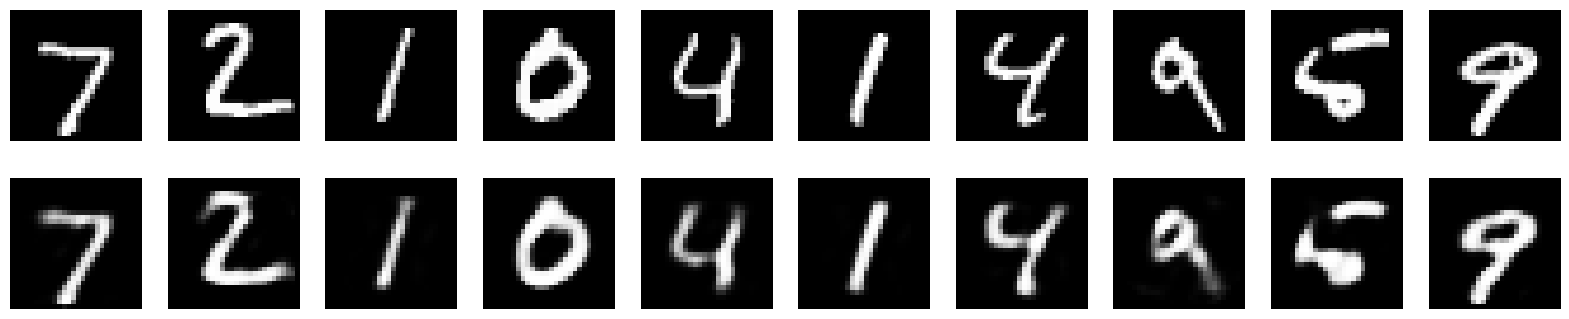

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.4192 - val_loss: 0.2269
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2124 - val_loss: 0.1806
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1770 - val_loss: 0.1632
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1615 - val_loss: 0.1523
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1515 - val_loss: 0.1454
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1457 - val_loss: 0.1412
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1421 - val_loss: 0.1386
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1391 - val_loss: 0.1363
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1371 - val_loss: 0.1346
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1355 - val_loss: 0.1332
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1342 - val_loss: 0.1319
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16m

In [ ]:
#q1 : Implementing a Basic Autoencoder
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import optimizers

# Step 1: Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the images to values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images to vectors of size 784 (28x28 pixels)
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

# Step 2: Define the Autoencoder model
# Encoder
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)  # Latent space of size 32

# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Step 3: Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Step 4: Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                validation_data=(x_test, x_test))

# Step 5: Visualize original vs. reconstructed images
def plot_images(original, reconstructed, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Display original images
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        ax.axis('off')

        # Display reconstructed images
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.show()

# Get reconstructed images
reconstructed_imgs = autoencoder.predict(x_test)

# Plot the original vs. reconstructed images
plot_images(x_test, reconstructed_imgs)

# Step 6: Modify latent dimension size and retrain
def experiment_with_latent_dimension(latent_dim):
    # Define autoencoder with different latent dimension size
    encoded = Dense(latent_dim, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    # Train the autoencoder
    autoencoder.fit(x_train, x_train,
                    epochs=50,
                    batch_size=256,
                    validation_data=(x_test, x_test))

    # Get reconstructed images
    reconstructed_imgs = autoencoder.predict(x_test)

    # Plot original vs reconstructed images
    print(f"Latent Dimension: {latent_dim}")
    plot_images(x_test, reconstructed_imgs)

# Experiment with different latent dimensions
experiment_with_latent_dimension(16)  # Smaller latent dimension
experiment_with_latent_dimension(64)  # Larger latent dimension

In [19]:
#qn 2  : Implementing a Denoising Autoencoder
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# 1. Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# 2. Normalize and reshape the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# 3. Add Gaussian noise to the images
noise_factor = 0.5
noisy_x_train = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
noisy_x_test = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the noisy images to make sure the pixel values are in [0, 1]
noisy_x_train = np.clip(noisy_x_train, 0.0, 1.0)
noisy_x_test = np.clip(noisy_x_test, 0.0, 1.0)

# 4. Define the autoencoder architecture
input_img = layers.Input(shape=(28, 28, 1))  # Input layer
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)  # First convolution layer
x = layers.MaxPooling2D((2, 2), padding='same')(x)  # Max pooling layer
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # Second convolution layer
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)  # Max pooling layer (encoded representation)

# 5. Decoder part
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)  # Conv layer
x = layers.UpSampling2D((2, 2))(x)  # Upsample layer
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)  # Conv layer
decoded = layers.UpSampling2D((2, 2))(x)  # Upsample layer
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)  # Output layer (reconstruction)

# 6. Define the model
autoencoder = models.Model(input_img, decoded)

# 7. Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 8. Train the model
autoencoder.fit(noisy_x_train, x_train, epochs=50, batch_size=128, validation_data=(noisy_x_test, x_test))

# 9. Visualize the results (noisy vs reconstructed)
decoded_imgs = autoencoder.predict(noisy_x_test)

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy input images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noisy_x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("Noisy")
    ax.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.set_title("Reconstructed")
    ax.axis('off')
plt.show()


Epoch 1/50
 29/469 ━━━━━━━━━━━━━━━━━━━━ 2:28 338ms/step - loss: 0.5185

KeyboardInterrupt: 

In [28]:
#qn 3 : Implementing an RNN for Text Generation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
import numpy as np

# Step 1: Load and Preprocess Text Dataset

# Define a simple text dataset for this example (you can replace this with a larger dataset)
text = """
    The quick brown fox jumps over the lazy dog.
    Pack my box with five dozen liquor jugs.
    How razorback-jumping frogs can level six piqued gymnasts!
    """

# Create a set of characters and a mapping from characters to integers and vice versa
chars = sorted(set(text))
char_to_index = {char: idx for idx, char in enumerate(chars)}
index_to_char = {idx: char for idx, char in enumerate(chars)}

# Convert text to integer sequences
text_as_int = np.array([char_to_index[c] for c in text])

# Define sequence length (context window) and prepare the data
seq_length = 10
X = []
y = []

for i in range(len(text_as_int) - seq_length):
    X.append(text_as_int[i:i+seq_length])
    y.append(text_as_int[i+seq_length])

X = np.array(X)
y = np.array(y)

# Step 2: Define the RNN Model using LSTM
model = Sequential()

# Input layer (Embedding layer)
model.add(Embedding(input_dim=len(chars), output_dim=128, input_length=seq_length))

# LSTM Layer
model.add(LSTM(128))

# Output layer (Dense layer)
model.add(Dense(len(chars), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# Step 3: Train the model
model.fit(X, y, epochs=50, batch_size=64)

# Step 4: Generate Text using the trained model
def generate_text(model, start_string, num_generate=100, temperature=1.0):
    # Convert start string to integers
    input_eval = [char_to_index[s] for s in start_string]
    input_eval = np.expand_dims(input_eval, axis=0)  # Make it a batch of size 1

    generated_text = start_string

    # Generate characters one by one
    for i in range(num_generate):
        predictions = model.predict(input_eval)

        # Use temperature to adjust the randomness of predictions
        predictions = predictions / temperature
        predicted_id = np.argmax(predictions)

        # Get the predicted character and append it to the generated text
        predicted_char = index_to_char[predicted_id]
        generated_text += predicted_char

        # Update the input sequence for the next prediction
        input_eval = np.roll(input_eval, -1)
        input_eval[0, -1] = predicted_id  # Replace the last element with the predicted char index

    return generated_text

# Step 5: Generate some text
start_string = "The quick"
generated_text = generate_text(model, start_string, num_generate=100, temperature=0.7)
print(generated_text)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - loss: 3.5253
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.4988
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.4681
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.4156
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.3124
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 3.1671
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.1432
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.1222
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0855
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0894
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0486
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0593
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0311
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.0190
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.9945
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━

In [29]:
# qn 4  : Sentiment Classification Using RNN

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the IMDB sentiment dataset
# Load the IMDB dataset with the top 10,000 words
max_features = 10000  # Limit the vocabulary to the top 10,000 words
maxlen = 200  # Maximum review length (number of words per review)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Step 2: Preprocess the text data
# Pad the sequences to ensure they all have the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Step 3: Build the LSTM-based sentiment classifier model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Step 4: Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 5: Train the model
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

# Step 6: Evaluate the model on test data
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Step 7: Generate Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Step 8: Plot the Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Step 9: Interpret the Precision-Recall Tradeoff
# In sentiment analysis, especially when the dataset is imbalanced (e.g., more negative reviews than positive),
# we often care more about the recall (sensitivity) of the positive class.
# This is because a false negative (predicting a positive review as negative) may have a more significant
# impact than a false positive (predicting a negative review as positive).
# Precision-Recall tradeoff helps us decide the optimal threshold based on whether we want to prioritize precision
# or recall, depending on the task requirements.


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


114/391 ━━━━━━━━━━━━━━━━━━━━ 3:24 738ms/step - accuracy: 0.6154 - loss: 0.6419

KeyboardInterrupt: 